In [74]:
#Install the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [75]:
#Load the Data
from google.colab import files
uploaded = files.upload()

Saving NFLX.csv to NFLX (2).csv


In [76]:
#storing Data into a dataframe
df = pd.read_csv('NFLX.csv')
print(df.head(6)) #We'll be focussing on the close(They're basically close prices)

         Date        Open        High  ...       Close   Adj Close   Volume
0  2020-07-31  488.290009  494.799988  ...  488.880005  488.880005  5916300
1  2020-08-03  490.859985  503.089996  ...  498.619995  498.619995  5873100
2  2020-08-04  498.649994  510.440002  ...  509.640015  509.640015  5608000
3  2020-08-05  508.679993  510.100006  ...  502.109985  502.109985  4308200
4  2020-08-06  504.109985  510.820007  ...  509.079987  509.079987  3725900
5  2020-08-07  505.450012  508.290009  ...  494.730011  494.730011  5910300

[6 rows x 7 columns]


In [77]:
#get the number of tradin days in the data set
df.shape

(252, 7)

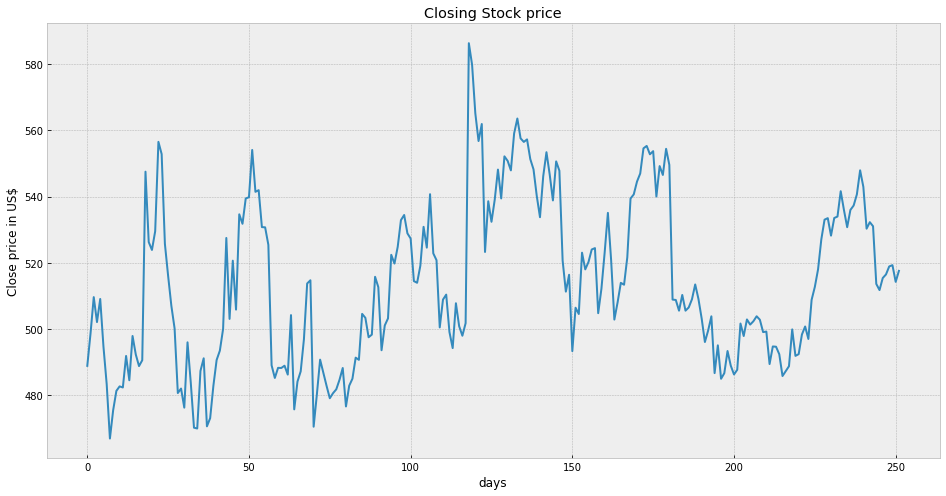

In [78]:
 #Visualize the close price data
 plt.figure(figsize = (16, 8))
 plt.title('Closing Stock price')
 plt.xlabel('days')
 plt.ylabel('Close price in US$')
 plt.plot(df['Close'])
 plt.show()

In [79]:
#Get the close price
df1 = df[['Close']]
df1.head(4)

,Close
0,488.880005
1,498.619995
2,509.640015
3,502.109985


In [80]:
#CREATE A VARIABLE TO PREDICT THE X OR X DAYS INTO THE FUTURE.
future_days = 25
#create a new column (target) shifted 'x'days.
df1['prediction'] = df1[['Close']].shift(-future_days)
df1.tail(4)
#These NaN values are expected here.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Close,prediction
248,518.909973,NaN
249,519.299988,NaN
250,514.250000,NaN
251,517.570007,NaN


In [81]:
#create the feature data set(x), convert it ot a numpy array and remove the last 'x' days/rows
X = np.array(df1.drop(['prediction'], 1))[:-future_days]
print(X)

[[488.880005]
 [498.619995]
 [509.640015]
 [502.109985]
 [509.079987]
 [494.730011]
 [483.380005]
 [466.929993]
 [475.470001]
 [481.329987]
 [482.679993]
 [482.350006]
 [491.869995]
 [484.529999]
 [497.899994]
 [492.309998]
 [488.809998]
 [490.579987]
 [547.530029]
 [526.27002 ]
 [523.890015]
 [529.559998]
 [556.549988]
 [552.840027]
 [525.75    ]
 [516.049988]
 [507.019989]
 [500.190002]
 [480.670013]
 [482.029999]
 [476.26001 ]
 [495.98999 ]
 [483.859985]
 [470.200012]
 [469.959991]
 [487.350006]
 [491.170013]
 [470.609985]
 [473.079987]
 [482.880005]
 [490.649994]
 [493.480011]
 [500.029999]
 [527.51001 ]
 [503.059998]
 [520.650024]
 [505.869995]
 [534.659973]
 [531.789978]
 [539.440002]
 [539.809998]
 [554.090027]
 [541.450012]
 [541.940002]
 [530.789978]
 [530.719971]
 [525.419983]
 [489.049988]
 [485.230011]
 [488.279999]
 [488.23999 ]
 [488.929993]
 [486.23999 ]
 [504.209991]
 [475.73999 ]
 [484.119995]
 [487.220001]
 [496.950012]
 [513.76001 ]
 [514.72998 ]
 [470.5     ]
 [480.

In [82]:
#Create the target dataset Y and we want ot convert it to a numpy array and get all the target values except 'X' rows/days
Y = np.array(df1['prediction'])[:-future_days]
print(Y)

[516.049988 507.019989 500.190002 480.670013 482.029999 476.26001
 495.98999  483.859985 470.200012 469.959991 487.350006 491.170013
 470.609985 473.079987 482.880005 490.649994 493.480011 500.029999
 527.51001  503.059998 520.650024 505.869995 534.659973 531.789978
 539.440002 539.809998 554.090027 541.450012 541.940002 530.789978
 530.719971 525.419983 489.049988 485.230011 488.279999 488.23999
 488.929993 486.23999  504.209991 475.73999  484.119995 487.220001
 496.950012 513.76001  514.72998  470.5      480.23999  490.76001
 486.769989 482.839996 479.100006 480.630005 481.790009 484.670013
 488.23999  476.619995 482.880005 485.       491.359985 490.700012
 504.579987 503.380005 497.519989 498.309998 515.780029 512.659973
 493.600006 501.089996 503.220001 522.419983 519.780029 524.830017
 532.900024 534.450012 528.909973 527.330017 514.47998  513.969971
 519.119995 530.869995 524.590027 540.72998  522.859985 520.799988
 500.48999  508.890015 510.399994 499.100006 494.25     507.79000

In [83]:
#Splitting the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

In [84]:
#create the models
#Create the decision tree Regressor Model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#create the linear regression model
lr = LinearRegression().fit(x_train, y_train)


In [85]:
#Get the last X rows of the feature dataset
x_future = df1.drop(['prediction'], 1)[: -future_days]
x_future = x_future.tail(future_days)
x_futute = np.array(x_future)
x_future

,Close
202,501.670013
203,497.890015
204,502.899994
205,501.339996
206,502.359985
207,503.859985
208,502.809998
209,499.079987
210,499.239990
211,489.429993


In [86]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#Show the model Linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[501.769989 533.030029 533.5      501.769989 533.539978 533.97998
 541.640015 507.019989 488.769989 535.97998  476.26001  540.679993
 547.950012 497.519989 530.309998 532.280029 531.049988 470.609985
 511.769989 515.409973 516.48999  518.909973 519.299988 510.299988
 517.570007]

[513.27326943 512.89801495 513.39537423 513.24050742 513.34176552
 513.49067611 513.38643999 513.0161479  513.032032   512.05815704
 512.58530023 512.57735972 512.35200946 511.69878665 511.8437254
 511.99263599 513.0965624  512.30336325 512.35399384 512.94268624
 513.1839207  512.80965984 513.98307598 514.37222729 514.90036431]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


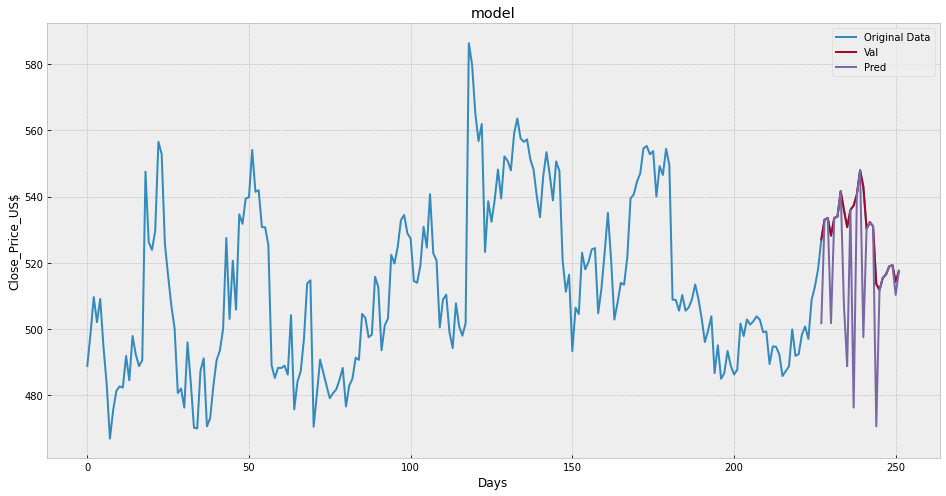

In [87]:
#Visualize the data above for tree prediction
predictions = tree_prediction

valid = df1[X.shape[0]:]
valid['predictions'] = predictions
plt.figure(figsize = (16, 8))
plt.title('model')
plt.xlabel('Days')
plt.ylabel('Close_Price_US$')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Original Data', 'Val', 'Pred'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


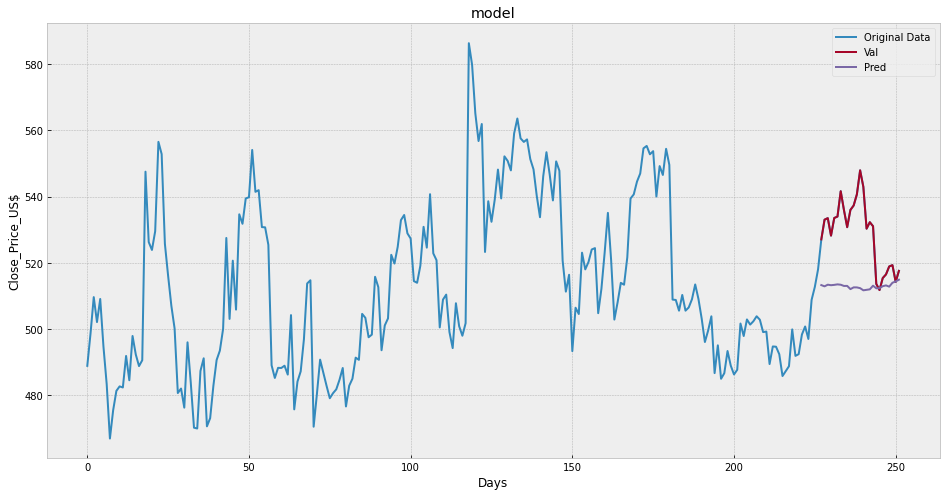

In [88]:
#Visualize the data above
predictions = lr_prediction

valid = df1[X.shape[0]:]
valid['predictions'] = predictions
plt.figure(figsize = (16, 8))
plt.title('model')
plt.xlabel('Days')
plt.ylabel('Close_Price_US$')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Original Data', 'Val', 'Pred'])
plt.show()